# 4. HEART DISEASE PREDICTION (CLASSIFICATION)

Theoretical Concept: What is Classification?
Classification is a type of supervised machine learning task where the goal is to predict a discrete category or class label. This is
different from regression, where we predict a continuous numerical value.
Classification vs. Regression:
• Classification: Is this email spam or not spam? (Two classes)
• Regression: What will be the price of this house? (Continuous value)
In this project, our goal is to predict one of two classes for a patient: (No Heart Disease) or 1 (Has Heart Disease). This is a binary
classification problem.

### STEP 1 : LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

sns.set_style('whitegrid')

In [2]:
heart_data = pd.read_csv("heart_disease_uci.csv")
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## STEP 2

###  EDA

In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
heart_data['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [8]:
heart_data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [4]:
heart_data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

### Analyzing the target variable

<p> Let's see the distribution of patients with and without heart disease.</p>

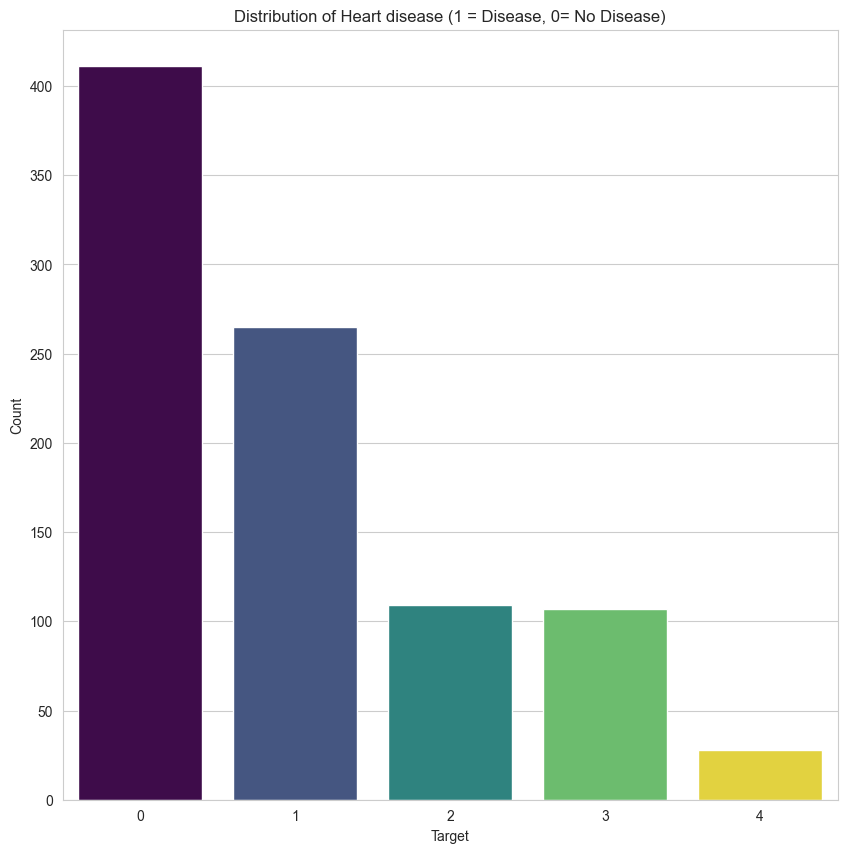

In [12]:
plt.figure(figsize=(10, 10))
sns.countplot(x='num', data=heart_data,palette='viridis', hue='num', legend=False)
plt.title('Distribution of Heart disease (1 = Disease, 0= No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

*insight* : <br>
dataset is fairly balanced, with a slightly higher number of patients having heart disease.

### 2.2 Analyzing Features

[Text(0, 0, 'Typical Angina'),
 Text(1, 0, 'Atypical Angina'),
 Text(2, 0, 'Non-anginal Pain'),
 Text(3, 0, 'Asymptomatic')]

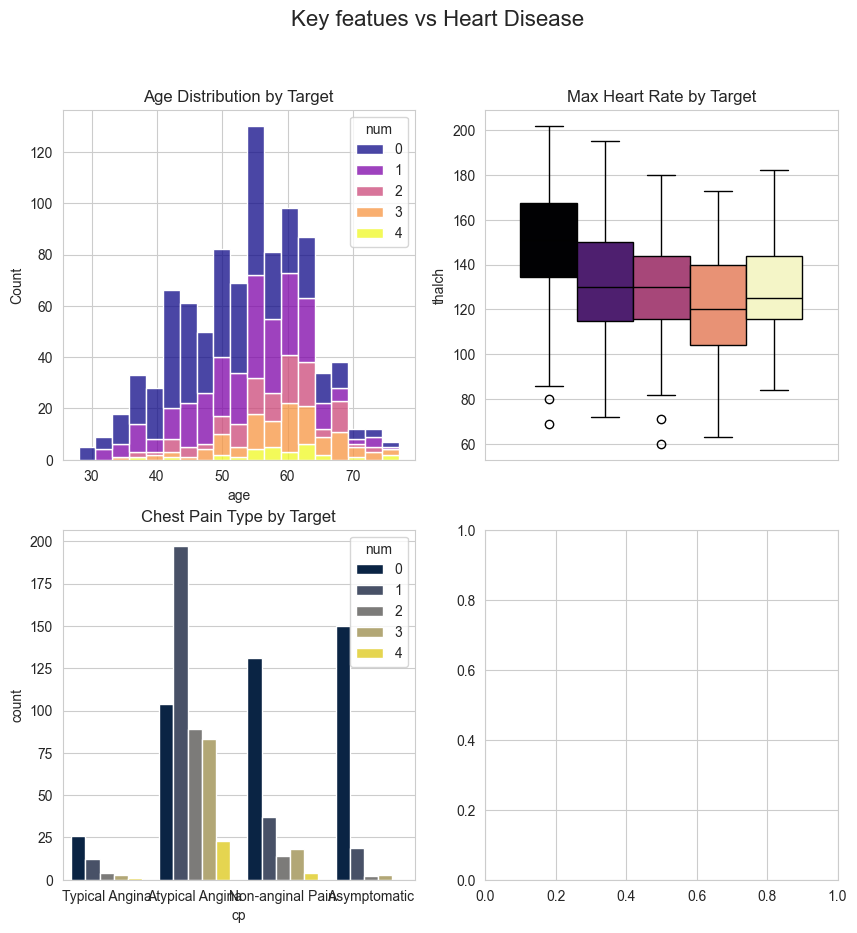

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Key featues vs Heart Disease', fontsize=16)



# age vs Target
sns.histplot(ax=axes[0, 0], data=heart_data, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

# max heart Rate vs target
sns.boxplot(ax=axes[0,1], data=heart_data, y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

# chest pain type vs Target
cp_plot = sns.countplot(ax=axes[1, 0], data=heart_data, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(heart_data['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])